# Este archivo es el código base para la parte práctica del examen del tercer parcial de la clase de Inteligencia Artificial

## Instrucciones

Por favor lea cuidadosamente y codifique lo que se le pida. Las instrucciones se verán de la siguiente manera:
```
***# Este ese el formato para las instrucciones***
```

## Entregables

Se entrega individualmente un archivo comprimido en Zip que contenga:

*   La libreta de Colab (extensión ipynb)
*   LA libreta de Colab en formato PDF; use la opción de imprimir para generarlo

## Evaluación

*   La celda requerida debe ejecutar sin errores: 1 pts
*   La celda requerida implementa el código solicitado: 1pts

## Código de ética profesional

Al entregar este archivo con sus implementaciones, acepta que el trabajo realizado es de su autoría y que de confirmarse lo contrario se anulará su examen.


```
Haga doble clic para editar la celda y llenar los datos correspondientes:
```

Nombre del estudiante: Enrique Ulises Báez Gómez Tagle

Fecha de entrega: 1/06/2023




In [99]:
### import the libraries and modules required

# libraries to manipulate the data and to visualise it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
# this is the library that contains the NN capabilities
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# the evaluation metrics for regression
from sklearn.metrics import mean_squared_error
# for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
# to meassure the execution time of the neural networks
import time

## Carga del conjunto de datos

`Cargue la base de datos gym-1sec.csv y muestre los últimos 5 registos:`

In [ ]:
# pd.read_csv()
df = pd.read_csv(filepath_or_buffer='gym-1sec.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
print('Dataset size {} columns and {} rows'.format(df.shape[1], df.shape[0]))
df.tail()

Dataset size 6 columns and 10125 rows


,date,pre,alt,hum,tem,occ
10121,2019-09-24 16:17:05,94960.91,543.86,56.44,28.61,M
10122,2019-09-24 16:17:06,94958.60,544.06,56.48,28.61,M
10123,2019-09-24 16:17:07,94958.60,544.06,56.72,28.63,M
10124,2019-09-24 16:17:08,94961.06,543.85,56.99,28.64,M
10125,2019-09-24 16:17:09,94958.84,544.04,56.96,28.65,M


```
Visualice la cantidad de datos que hay en cada una de los differentes valores de la característica (feature) nivel de occupación.

La descripción de las variables es como sigue de izquierda a derecha:

*   Fecha de registro
*   Presión barométrica en hecto-pascal
*   Altura relativa desde el nivel del mar en metros
*   Humedad relativa en porcentaje
*   Temperatura en grados celcius
*   Nivel de ocupación en etiquetas
```



In [101]:
# <mi conjunto de datos>.groupby('mi variable de interés').size()
df.groupby('occ').size()

occ
H    2358
L    2442
M    5325
dtype: int64

```
Utilice el análisis de los 5 números para visualizar la descripción del cconjunto de datos
```



In [102]:
# .describe()
df.describe()

,pre,alt,hum,tem
count,10125.000000,10125.000000,10125.000000,10125.000000
mean,95171.915784,525.373692,56.746984,27.808434
std,169.404796,14.839785,2.293076,0.820957
min,94893.870000,501.210000,50.660000,25.880000
25%,95000.700000,509.410000,55.390000,27.210000
50%,95230.360000,520.240000,56.400000,27.490000
75%,95354.250000,540.370000,58.620000,28.510000
max,95447.960000,549.790000,65.390000,29.970000


## Visualización de los datos

```
Modifique el siguiente código para visualizar la temperatura de la sala de todos los niveles de ocupación (en el eje y) respecto a la altura (en el eje x)

Nombre la gráfiica adecuadamente a los datos que se muestran
```



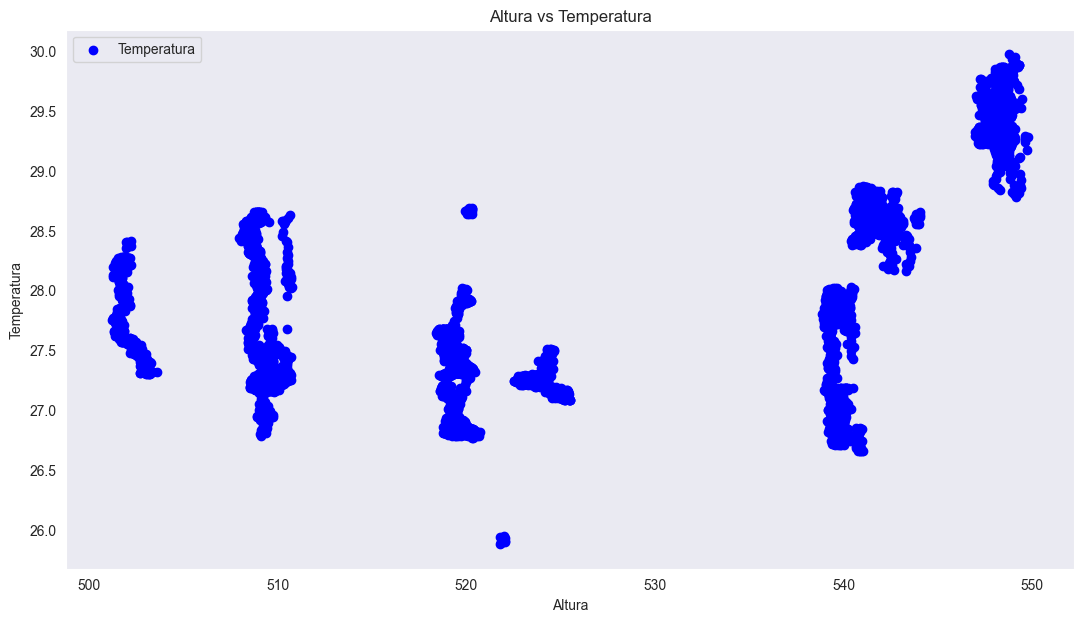

In [103]:
# l = <mi conjunto de datos>[<mi conjunto de datos>.<variable de nivel de ocupación> == "valor de la variable de ocupación"]
# EN LUGAR DE NIVEL DE OCUPACION SI ES TEMPERATURA EN Y
y = df['tem']
x = df['alt']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

# ax.scatter(l['variable en el eje x'], l['variable en el eje y'], label="etiqueta de los valores", facecolor="blue")
ax.scatter(x, y, label="Temperatura", facecolor="blue")

ax.set_xlabel("Altura")
ax.set_ylabel("Temperatura")
ax.grid()
# ax.set_title("Un título que corresponda con mi gráfica")
ax.set_title("Altura vs Temperatura")
ax.legend()

plt.show()

## Generación del conjunto de datos de entrenamiento y testeo

```
Utilice la siguiente función para hacer la codificación a formato numérico de los diferentes valores de la variable de interés
```



In [104]:
def coder(feature):
    if feature == 'L':
        return 0
    elif feature == 'M':
        return 1
    else:
        return 2

# <mi conjunto de datos>['variable de interés'] = <mi conjunto de datos>['variable de interés'].apply(coder)
df['occ'] = df['occ'].apply(coder)

```
Genere los conjuntos de datos de entrenamiento y testeo de la siguiente manera:

*   El conjunto de testeo debe ser el 5% aleatorio del conjunto de datos total
*   Para el conjunto de entrenamiento, utilice todas las variables/características del conjunto de datos con excepción de:
 'date' y 'occ'
*   Seleccione la varible de nivel de ocupación como la variable/característica de interés para hacer la regresion
```



In [105]:
# X will be our dataset without the feature of interest
# X = <mi conjunto de datos>.drop(['mis variables que no son de interés'], axis=1)
X = df.drop(['date', 'occ'], axis=1)

# converting into numpy array and # FIXME: assigning petal length and petal width (not about flowers)
X = np.array(X)

# y will be our dataset with the feature of interest
# y = <mi conjunto de datos>['mi variable de interés']
Y = df['occ']

# VALIDATE SHAPES
print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

# Splitting into train and test
# <mis subconjuntos de entrenamiento y testeo> = train_test_split(X,y,test_size=0.5,random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=42)

X shape: (10125, 4)
Y shape: (10125,)


## Escalamiento

```
Si es necesario escalar los datos hágalo; en caso contrario, escribir no es necesario escalar los datos en la celda como comentario
```



In [106]:
print('Min values of the dataset are: \n{}'.format(df.min()))
print('Max values of the dataset are: \n{}'.format(df.max()))

# Determine if the data needs to be scaled
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the dataset are: \n{}'.format(X_train_scaled.min(axis=0)))
print('Max values of the dataset are: \n{}'.format(X_train_scaled.max(axis=0)))

print('Min values of the dataset are: \n{}'.format(X_test_scaled.min()))
print('Max values of the dataset are: \n{}'.format(X_test_scaled.max()))

Min values of the dataset are: 
date    2019-09-18 19:04:00
pre                94893.87
alt                  501.21
hum                   50.66
tem                   25.88
occ                       0
dtype: object
Max values of the dataset are: 
date    2019-10-02 20:48:58
pre                95447.96
alt                  549.79
hum                   65.39
tem                   29.97
occ                       2
dtype: object
Min values of the dataset are: 
[-1.64809243 -1.629142   -2.64754226 -2.35274138]
Max values of the dataset are: 
[1.63033299 1.65211843 3.76547249 2.63974148]
Min values of the dataset are: 
-2.328328262015973
Max values of the dataset are: 
3.0384029274199404


## Regresion

### Definición del modelo

```
Defina un modelo de red neuronal con las siguientes características:

*   4 capas en total
*   La capa de salida debe tener el mimso número de neuronas que el número de resultados esperados por cada renglón/predicción
*   La capa de entrada debe tener el mismo número de neuroas que el número de niveles de ocupacón
*   La primer capa intermedia debe tener el número de neuronas igual al número de características/variables del conjunto de datos de entrenamiento
*   La segunda capa intermedia debe tener la mitad de neuronas que la capa anterior
*   Un máximo número de iteraciones del número de clases/tipos de nivel de ocupación multiplicado por 100
*   Usar la función de activación tangente hiperbólica
*   Usar el solucionador adam
```



In [107]:
# MLPRegressor(
#     activation = 'adam',
#     solver = 'tanh'
# )

from sklearn.neural_network import MLPRegressor

# Number of features and expected results
feature_num = X_train.shape[1]
exp_res_num = len(Y_train.unique())

mlp_reg = MLPRegressor(hidden_layer_sizes=(feature_num, feature_num // 2),
                       activation='tanh', solver='adam',
                       max_iter=exp_res_num * 100, random_state=42)


### Entrenamiento

```
Entrene el modelo definido con anterioridad y muestrer su tiempo de ejecución en segundos
```
**Importante:** esto puede tomar aproximadamente unos 5 minutos



In [108]:
# <mi modelo de regresión>.fit(<subconjunto de entrenamiento en x>, <subconjunto de entrenamiento en y>)
start_time = time.time()
mlp_reg.fit(X_train_scaled, Y_train)
end_time = time.time()
print('Time elapsed on training: {:.2f} seconds'.format(end_time - start_time))
# 5.708560466766357

Time elapsed on training: 1.06 seconds


### Testeo y evaluación del modelo

```
Utilice el modelo entrenado para hacer la regresión de los datos de testeo
```



In [109]:
# <mi modelo de regresión>g.predict()
predictions = mlp_reg.predict(X_test_scaled)
print(predictions)
# array([1.99312555, 0.32425411, 1.03872412, ..., 1.956635  , 0.26321265,
# 1.17075748])

[ 1.01124267e+00  1.64057837e+00  1.62874399e-02  7.68083537e-02
  9.78846535e-01  1.04209992e+00 -2.81349318e-02 -2.82786495e-02
  9.49068851e-01  1.04590951e+00  9.78715542e-01  1.73050773e+00
  1.04390030e+00  1.57429310e-02 -1.96071891e-02  1.12301658e+00
  1.05362677e+00 -2.54991193e-02  1.05308691e+00  1.06319763e+00
  2.00546401e+00 -1.53565032e-02 -3.34945665e-02  2.03568247e+00
  1.02158770e+00  9.79957726e-01  1.84733515e+00  1.04740516e+00
  9.78963106e-01 -3.89230675e-02  1.02961074e+00 -1.97420022e-02
  2.15252847e+00  1.11265248e+00  1.05338044e+00  2.04176553e+00
  9.98031476e-01 -1.19470197e-02  1.89394998e+00  9.37246838e-01
  1.05087501e+00  9.91835299e-01 -2.06053195e-02  9.79122547e-01
  1.72161791e+00 -1.35202436e-02 -3.49067418e-02  1.85150494e+00
  2.04360786e+00  9.31867137e-01 -2.85167130e-02  1.05478170e+00
  1.05230005e+00  1.02364215e+00  1.05510915e+00  1.02368094e+00
  1.00295458e+00 -1.81532760e-02  9.66341345e-01  3.50859823e-02
  1.04362455e+00  1.05039


```
Evalue el mejor modelo de regresión para mostrar su error cuadrático medio
```



In [110]:
# print('mse: {:.2f}'.format(mean_squared_error(<subconjunto de testeo en y>, <predicciones realizadas por el modelo>)))
print('mse: {:.2f}'.format(mean_squared_error(Y_test, predictions)))
# mse: 0.03

mse: 0.02



```
Visualice la curva de entrenamiento
```



Accuracy rate: 0.96


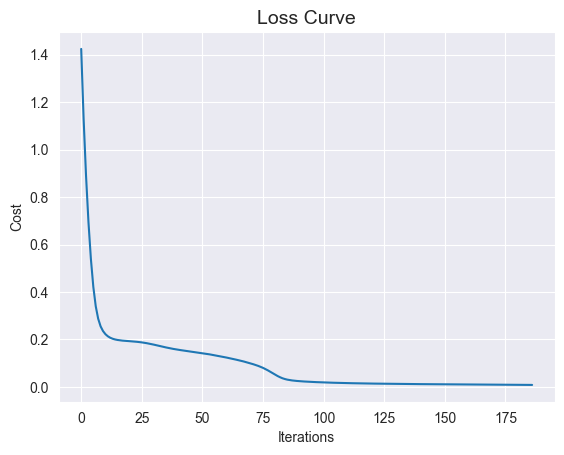

In [111]:
# see how well was the training of the model
# plt.plot(<mi modelo de regresión>.loss_curve_)

# Show accuracy rate
print('Accuracy rate: {:.2f}'.format(mlp_reg.score(X_test_scaled, Y_test)))

plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


```
Visualice la diferencia entre los valores reales y los predichos por la red neuronal
```



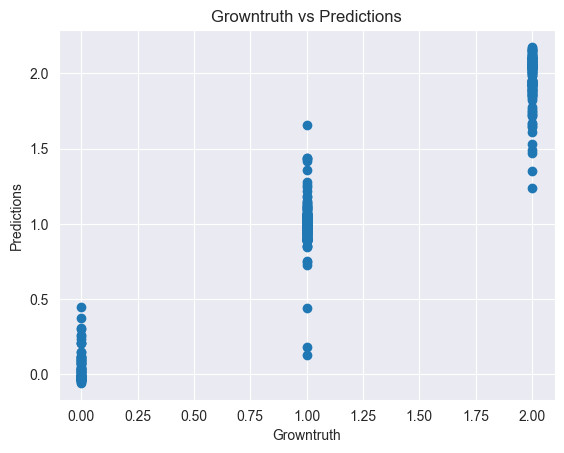

In [112]:
# pd.DataFrame({'growntruth': <subconjunto de testeo en y>,'predictions': <predicciones>})
pd.DataFrame({'growntruth': Y_test, 'predictions': predictions})
# Plot this comparison as scatter plot
plt.scatter(Y_test, predictions)
plt.xlabel('Growntruth')
plt.ylabel('Predictions')
plt.title('Growntruth vs Predictions')
plt.show()



```
Con el valor del accuracy y las gráficas de entrenamiento y matriz de confusión explique brevemente el rendimiento del modelo de red neuronal entrenado
```


**We got an accuracy of 0.96 which is really good, and the loss curve shows that the model is learning. From the plot we can see that there is a correct estimation of data**

### Búsqueda de hiperparámetros a través de una matriz



```
Defina una matriz de búsqueda de hiperparámetros que contenga lo siguiente:

*   Un modelo de red neuronal con el número de capaz y neuronas que considere lleve a mejorar el aprendizaje en la tarea de regresión
*   El número de iteraciones que consideren sean pertinentes
*   El optimizador de la familia de los métodos quasi-Newton
*   La función de activación relu
```



In [113]:
param_grid = {
    'activation': ['relu'],  # Function of activation
    'hidden_layer_sizes': [(64, 128, 64)],  # Number of neurons in the hidden layers
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'solver': ['lbfgs', 'bfgs', 'newton-cg']  # Quasi-Newton optimizer
}


```
Defina la búsqueda de la matriz sin validación cruzada
```



In [114]:
grid_search = GridSearchCV(mlp_reg, param_grid, n_jobs=-1)


```
Execute la búsqueda de los hiperparámetros y muestre el tiempo total de execución
```

**Importante:** tenga en mente que esta sección puede tardar varios minutos, de acuerdo a los modelos incluídos en la búsqueda

In [115]:
tc_start = time.time()
grid_search.fit(X_train_scaled, Y_train)
tc_end = time.time()
# print(tc_end-tc_start)
print('Time elapsed on training: {:.2f} seconds'.format(tc_end - tc_start))
# 13.170661687850952

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

Time elapsed on training: 53.57 seconds


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



```
Muestre el 'mejor modelo' de la búsqueda de los hiperparámetros
```



In [116]:
# print('The best hyper parameter values are:\n{}'.format(<mi búsqueda de cuadrícula>.best_params_))
print('The best hyper parameter values are:\n{}'.format(grid_search.best_params_))
# The best hyper parameter values are:
# {'activation': 'tanh', 'hidden_layer_sizes': (8, 16, 8), 'max_iter': 200, 'solver': 'lbfgs'}

The best hyper parameter values are:
{'activation': 'relu', 'hidden_layer_sizes': (64, 128, 64), 'max_iter': 300, 'solver': 'lbfgs'}



```
Obtenga y muestre las predicciones con el mejor modelo de la búsqueda de hiperparámetros
```



In [117]:
# <mi búsqueda de cuadrícula>.best_estimator_.predict()
predictions = grid_search.best_estimator_.predict(X_test_scaled)
# array([2.01497909, 0.10336705, 1.00173473, ..., 1.99163308, 0.00839881,
# 0.987649  ])
predictions

array([ 1.00500348e+00,  1.97591053e+00, -2.18169654e-04,  1.51524997e-03,
        1.01123964e+00,  1.00119306e+00,  2.91281361e-03,  4.70057430e-03,
        9.98910751e-01,  9.77457124e-01,  1.01221439e+00,  2.00251301e+00,
        1.01708915e+00,  9.45686440e-03, -1.39361469e-02,  9.98543548e-01,
        9.95405623e-01,  2.52913147e-03,  9.93716992e-01,  1.00589148e+00,
        1.97701119e+00, -1.36166592e-02, -2.06276908e-03,  1.95831916e+00,
        9.93796673e-01,  1.00842773e+00,  2.00382615e+00,  9.72834423e-01,
        9.93320158e-01, -4.86033760e-03,  1.00151923e+00, -9.56083765e-03,
        1.99528424e+00,  9.91091766e-01,  1.00350921e+00,  2.01970421e+00,
        9.62246528e-01,  4.63757823e-03,  1.98891838e+00,  1.00503308e+00,
        1.00665367e+00,  9.92989577e-01, -7.74701083e-03,  9.92306682e-01,
        2.00737658e+00, -1.15748682e-03, -7.20226984e-04,  1.99050258e+00,
        1.96710800e+00,  1.00462751e+00,  4.30957400e-03,  1.00199388e+00,
        1.00188291e+00,  


```
Evalue el mejor modelo de regresión resultante de la búsqueda de hiperparámetros para mostrar su error cuadrático medio
```



mse: 0.00
Accuracy rate: 1.00


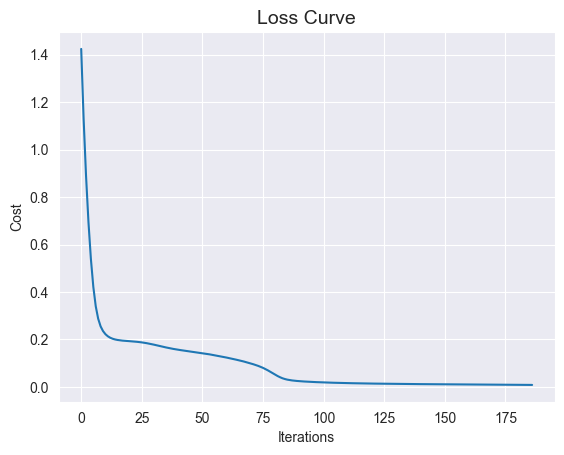

In [118]:
# print('mse: {:.2f}'.format(mean_squared_error()))
print('mse: {:.2f}'.format(mean_squared_error(Y_test, predictions)))
# mse: 0.00

# Show new loss curve + accuracy
print('Accuracy rate: {:.2f}'.format(grid_search.best_estimator_.score(X_test_scaled, Y_test)))
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


```
Visualice la diferencia entre los valores reales y los predichos por la red neuronal
```



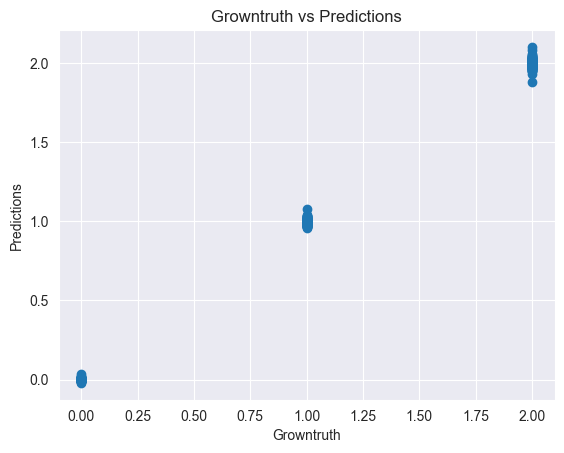

In [119]:
# pd.DataFrame({'growntruth': <subconjunto de testeo en y>,'predictions': <predicciones>})
pd.DataFrame({'growntruth': Y_test, 'predictions': predictions})
# Plot this comparison as scatter plot
plt.scatter(Y_test, predictions)
plt.xlabel('Growntruth')
plt.ylabel('Predictions')
plt.title('Growntruth vs Predictions')
plt.show()

## Conclusiones

```
De acuerdo a los resultados de las métricas de evaluación y a las gráficas de matriz de confusión, mencione qué modelo de red neuronal se desempeñó mejor y por qué considera que fue así
```



**With these hypertuned parameters, a rate of 1 was achieved, which says that our model was overtrained with these parameters found. **

